In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../../datasets/train_features.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023',
       '1024'],
      dtype='object', length=1025)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,-3.210069,-4.458862,-0.878512,-9.101152,-11.970865,1.784717,2.959738,4.797460,-13.834463,-0.261578,...,3.472469,-5.928474,-1.585344,7.044512,3.351335,2.595461,4.681990,0.276043,-3.234175,2.0
1,-4.577524,-5.676576,-2.340113,-10.764790,-13.815485,2.603069,3.958373,6.244400,-14.038521,-0.366628,...,4.676921,-8.461687,-1.881620,9.183582,3.957644,4.263472,5.924525,0.291932,-4.050914,2.0
2,0.660451,0.264598,1.986459,2.682943,3.441537,-0.483278,-0.000470,-2.272786,5.390817,0.233887,...,0.410656,1.886437,0.972049,-2.938727,-0.221072,-1.883689,0.118852,0.635082,1.586291,1.0
3,-0.585011,-1.931929,2.918542,-5.462645,-7.645029,-0.021875,1.382597,1.764294,-13.119708,0.048759,...,0.767551,-0.621759,-0.289813,2.448361,2.664419,-0.916472,1.891101,0.544798,-1.289092,0.0
4,-3.759083,-4.918644,-1.571457,-9.856080,-12.780863,2.122068,3.415359,5.466081,-13.835334,-0.401230,...,4.043961,-6.606894,-1.719708,7.779760,3.606975,3.311950,5.148464,0.244136,-3.634058,2.0


In [5]:
df.shape

(12000, 1025)

In [6]:
[i for i in df.columns if df[i].isnull().sum() > 0]

[]

In [7]:
[i for i in df.columns if df[i].dtype == 'object']

[]

In [8]:
X = df.drop(['1024'], axis=1)
y = df['1024']

y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape

((9600, 1024), (2400, 1024))

In [10]:
y_train.shape, y_test.shape

((9600,), (2400,))

In [11]:
type(X_train), type(y_train), type(X_test), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [12]:
n_estimators_num_list = [5, 10, 20, 50, 100, 200, 300, 500, 1000]
prob = []
correct = []

In [13]:
train_accuracy = {}
test_accuracy = {}

In [14]:
# Random Forest
for n_estimators_num in n_estimators_num_list:
    rf = RandomForestClassifier(n_estimators=n_estimators_num, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict_proba(X_train)
    prob.append(y_pred_train[np.arange(len(y_train)), y_train])
    correct.append(y_train == np.argmax(y_pred_train, axis=1))
    y_pred = rf.predict(X_test)
    train_accuracy[n_estimators_num] = accuracy_score(y_train, y_pred_train.argmax(axis=1))
    test_accuracy[n_estimators_num] = accuracy_score(y_test, y_pred)
    print(f'n_estimators: {n_estimators_num}, Train accuracy: {train_accuracy[n_estimators_num]}, Test accuracy: {test_accuracy[n_estimators_num]}')

n_estimators: 5, Train accuracy: 0.9975, Test accuracy: 0.9741666666666666
n_estimators: 10, Train accuracy: 0.9988541666666667, Test accuracy: 0.9770833333333333
n_estimators: 20, Train accuracy: 0.9994791666666667, Test accuracy: 0.9783333333333334
n_estimators: 50, Train accuracy: 1.0, Test accuracy: 0.9808333333333333
n_estimators: 100, Train accuracy: 1.0, Test accuracy: 0.9825
n_estimators: 200, Train accuracy: 1.0, Test accuracy: 0.9825
n_estimators: 300, Train accuracy: 1.0, Test accuracy: 0.9825
n_estimators: 500, Train accuracy: 1.0, Test accuracy: 0.9825
n_estimators: 1000, Train accuracy: 1.0, Test accuracy: 0.9820833333333333


In [15]:
prob = np.array(prob)
correct = np.array(correct)

In [16]:
prob = prob.T
correct = correct.T

In [17]:
mean = np.mean(prob, axis=1)
std = np.std(prob, axis=1)
varibility = std / mean

In [18]:
correctness = np.mean(correct, axis=1)

In [19]:
varibility.shape

(9600,)

In [20]:
correctness.shape

(9600,)

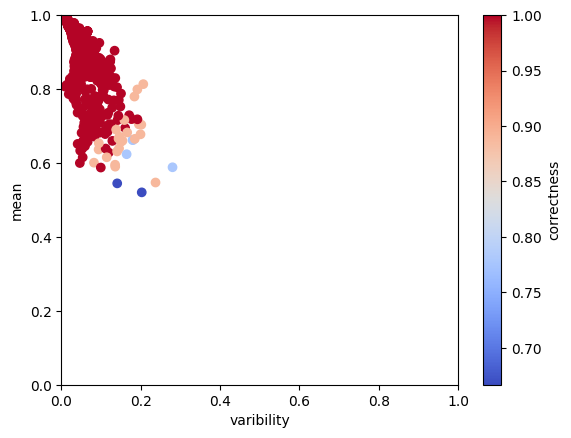

In [21]:
plt.figure()
plt.scatter(varibility, mean, c=correctness, cmap='coolwarm')
plt.colorbar(label = 'correctness')
plt.xlabel('varibility')
plt.ylabel('mean')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [22]:
correctness_min, correctness_max = np.min(correctness), np.max(correctness)

In [23]:
# pick range
correctness_range = [[min_i, min_i + 0.1] for min_i in np.arange(correctness_min, 1.1, 0.1)]
correctness_range

[[0.6666666666666666, 0.7666666666666666],
 [0.7666666666666666, 0.8666666666666666],
 [0.8666666666666666, 0.9666666666666666],
 [0.9666666666666666, 1.0666666666666667],
 [1.0666666666666664, 1.1666666666666665]]

In [24]:
pick = []
for j in range(len(correctness_range)):
    pick.append([idx for idx,i in enumerate(correctness) if correctness_range[j][0] <= i < correctness_range[j][1]])

In [25]:
pick_train_x = []
pick_train_y = []
for i in pick:
    pick_train_x.append(X_train.iloc[i, :])
    pick_train_y.append(y_train.iloc[i])

In [26]:
def decrease_n_estimators(index: int) -> int:
    base = 300  # 可以設定一個基礎數值
    return max(10, base - index * 20)  # 確保 n_estimators 不會小於某個最小值，例如 10

In [27]:
model_list = []
for I in range(len(pick_train_x)):
    # 創建和訓練隨機森林模型
    rf = RandomForestClassifier(n_estimators=decrease_n_estimators(I), random_state=42, n_jobs=-1)
    print(f"Training model {I}")
    print(f"Training data shape: {pick_train_x[I].shape}, {pick_train_y[I].shape}")
    if len(pick_train_x[I]) == 0:
        continue
    rf.fit(pick_train_x[I], pick_train_y[I])
    model_list.append(rf)

print(f"Total models trained: {len(model_list)}")

Training model 0
Training data shape: (2, 1024), (2,)
Training model 1
Training data shape: (4, 1024), (4,)
Training model 2
Training data shape: (26, 1024), (26,)
Training model 3
Training data shape: (9568, 1024), (9568,)
Training model 4
Training data shape: (0, 1024), (0,)
Total models trained: 4


In [28]:
# Ensemble
from sklearn.ensemble import VotingClassifier
from rich import print as rprint

model_list = [(f'model_{i}', model_list[i]) for i in range(len(model_list))]
rprint(model_list)

vc = VotingClassifier(estimators=model_list, voting='soft')
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print(f'Ensemble accuracy: {accuracy_score(y_test, y_pred)}')

[
    ('model_0', RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)),
    ('model_1', RandomForestClassifier(n_estimators=280, n_jobs=-1, random_state=42)),
    ('model_2', RandomForestClassifier(n_estimators=260, n_jobs=-1, random_state=42)),
    ('model_3', RandomForestClassifier(n_estimators=240, n_jobs=-1, random_state=42))
]

Ensemble accuracy: 0.9825


In [29]:
vc

VotingClassifier(estimators=[('model_0',
                              RandomForestClassifier(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_1',
                              RandomForestClassifier(n_estimators=280,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_2',
                              RandomForestClassifier(n_estimators=260,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('model_3',
                              RandomForestClassifier(n_estimators=240,
                                                     n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

In [32]:
train_accuracy["Voting"] = accuracy_score(y_train, vc.predict(X_train))
test_accuracy["Voting"] = accuracy_score(y_test, y_pred)

In [37]:
rprint(train_accuracy)

{
    5: 0.9749730453817754,
    10: 0.9910804717874996,
    20: 0.9972882020452838,
    50: 0.9996732773548535,
    100: 0.9999836638677426,
    200: 1.0,
    300: 1.0,
    500: 1.0,
    1000: 1.0,
    'Voting': 1.0
}

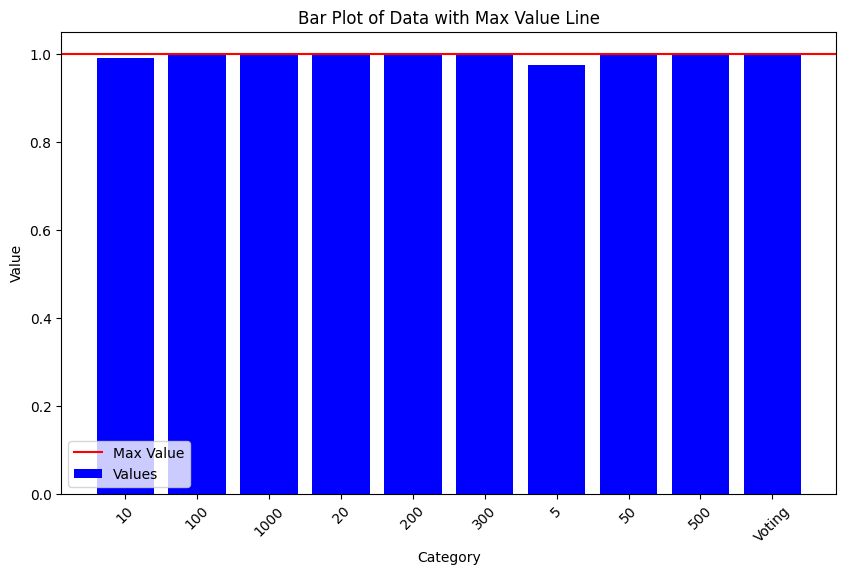

In [40]:
# plot

# Sorting the data for better visualization
keys = sorted(train_accuracy.keys(), key=lambda x: str(x))
values = [train_accuracy[key] for key in keys]
max_value = max(values)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(range(len(train_accuracy)), values, color='blue', label='Values')
plt.axhline(y=max_value, color='r', linestyle='-', label='Max Value')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Model Train Accuracy')
plt.xticks(range(len(train_accuracy)), keys, rotation=45)
plt.legend()
plt.show()


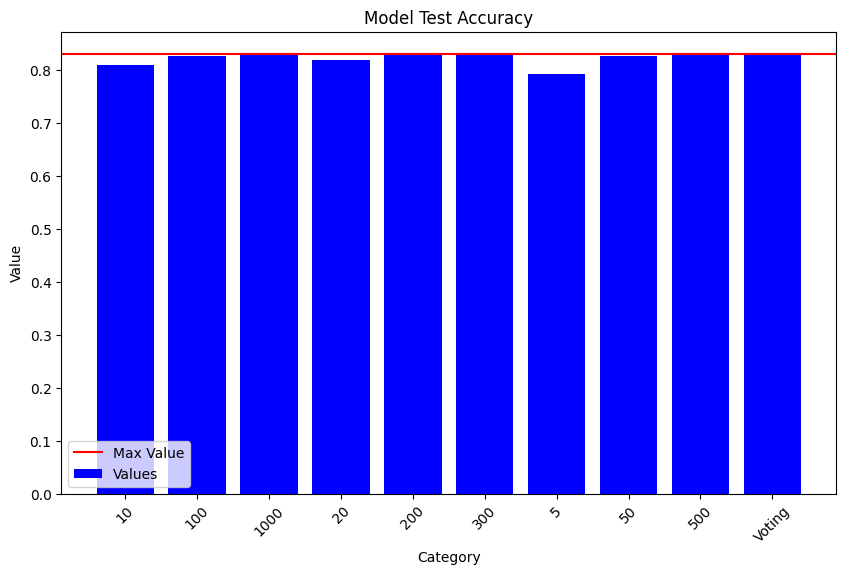

In [41]:
keys = sorted(test_accuracy.keys(), key=lambda x: str(x))
values = [test_accuracy[key] for key in keys]
max_value = max(values)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(range(len(test_accuracy)), values, color='blue', label='Values')
plt.axhline(y=max_value, color='r', linestyle='-', label='Max Value')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Model Test Accuracy')
plt.xticks(range(len(test_accuracy)), keys, rotation=45)
plt.legend()
plt.show()